In [1]:
import sys
import os

# set path of this project to sys.path
sys.path.append(os.path.join(os.getcwd(), "../../.."))

# Update content of packages when has changes in jupyter
%load_ext autoreload
%autoreload 2

In [2]:
from Baseline.baseline import lowpass_filter, StockDataset
from Baseline.experiments.MFI_exp.alpha_MFI import MFIAlpha
import datetime

# 2. Split data

In [3]:
dataset = StockDataset(
    stock_csv_path='../../data/data1mins.csv',
    exp_path='../../data/expiration_date.csv',
    train_test_split_time_point=datetime.datetime(2023, 1, 1, 0, 0, 0),
)
train_data, test_data = dataset.get_data()
expiration_date = dataset.get_expiration_date()

# 3. Run backtesting

100%|██████████| 326252/326252 [02:12<00:00, 2456.54it/s]


Margin: 10.21
MDD: 172.5 (11.03%)

   Total trading quantity: 1365
         Profit per trade: 1.55
             Total Profit: 2934.6
         Profit after fee: 2111.7
 Trading quantity per day: 1.01
 Profit per day after fee: 1.56
                   Return: 0.25
          Profit per year: 391.45
                  HitRate: 0.47
          HitRate per day: 0.57


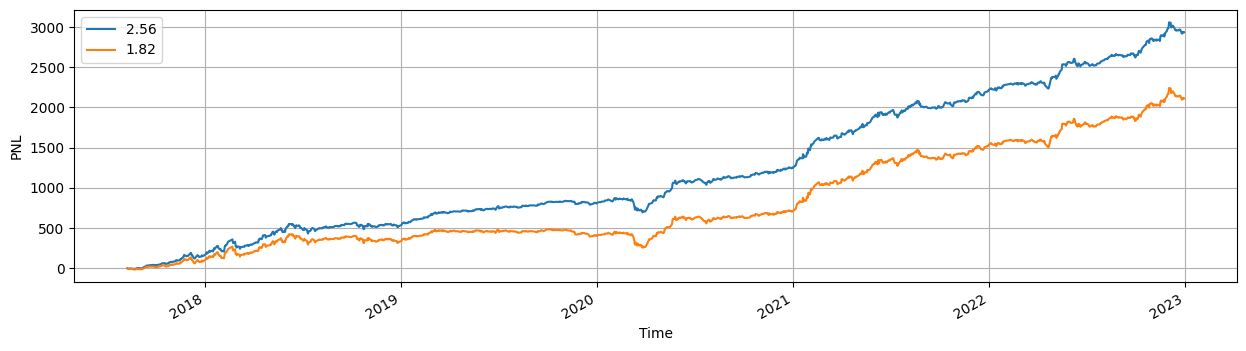

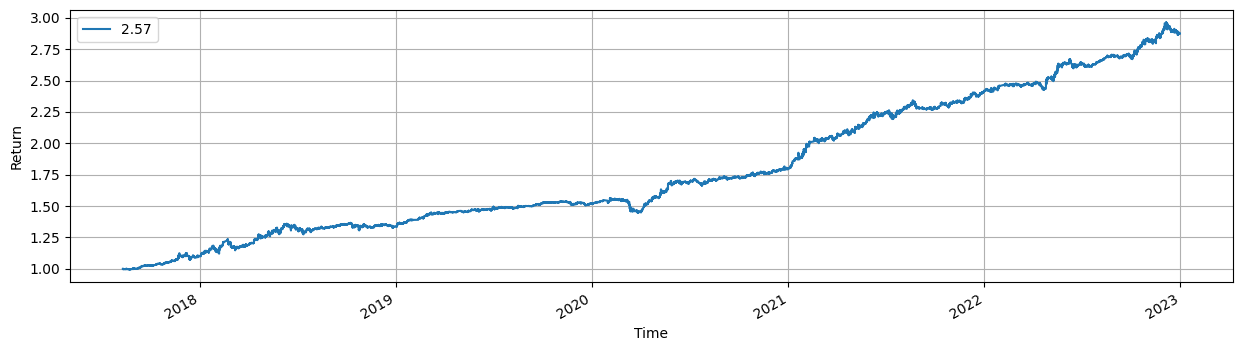

In [6]:
alpha = MFIAlpha(
    stock_data=train_data,
    expiration_date=expiration_date,
    mfi_period=27,
    mfi_upper=75,
    mfi_lower=24,
    mfi_middle_upper=71,
    mfi_middle_lower=19,
    lowpass_filter_ratio=0.394980788671196
)
res = alpha.backtest()

100%|██████████| 326252/326252 [02:15<00:00, 2414.87it/s]


Margin: 7.17
MDD: 77.7 (4.96%)

   Total trading quantity: 993
         Profit per trade: 0.99
             Total Profit: 1497.5
         Profit after fee: 980.9
 Trading quantity per day: 0.73
 Profit per day after fee: 0.73
                   Return: 0.12
          Profit per year: 181.83
                  HitRate: 0.44
          HitRate per day: 0.35


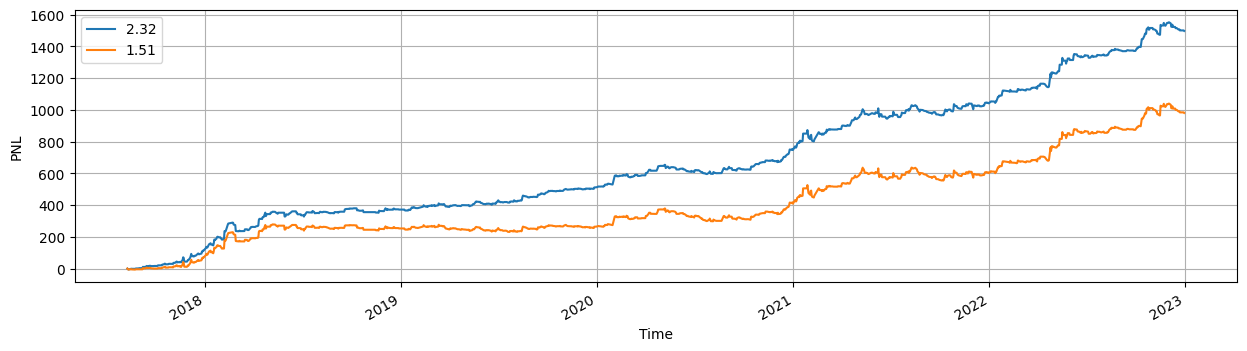

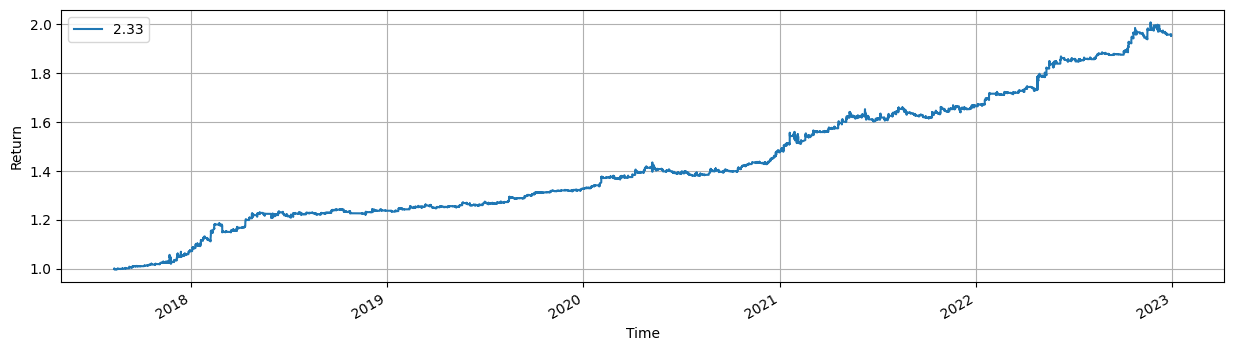

In [7]:
alpha = MFIAlpha(
    stock_data=train_data,
    expiration_date=expiration_date,
    mfi_period=25,
    mfi_upper=81,
    mfi_lower=15,
    mfi_middle_upper=62,
    mfi_middle_lower=30,
    lowpass_filter_ratio=0.6360
)
res = alpha.backtest()